In [ ]:
# !pip install catboost
# !pip install xgboost

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier

warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head(40)


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [4]:
diabetes.shape


(520, 17)

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [6]:
diabetes.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [7]:
diabetes.isna().sum()

,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


In [8]:
diabetes['class'].value_counts()

,count
class,
Positive,320
Negative,200


<Axes: xlabel='class'>

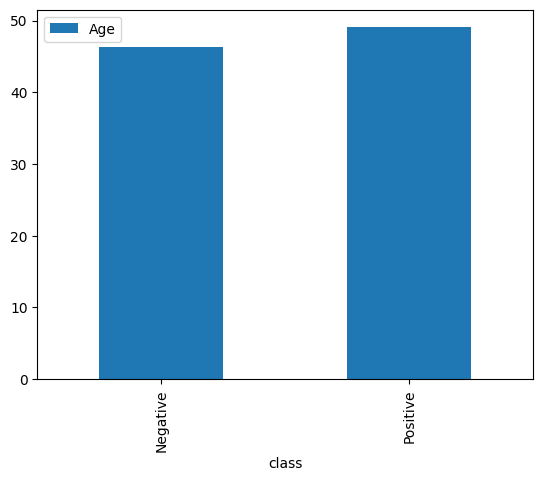

In [9]:
diabetes[["Age","class"]].groupby("class").mean().plot.bar()

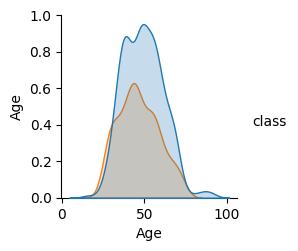

In [10]:
# Plot pairplot
sns.pairplot(diabetes, hue='class')
plt.show()

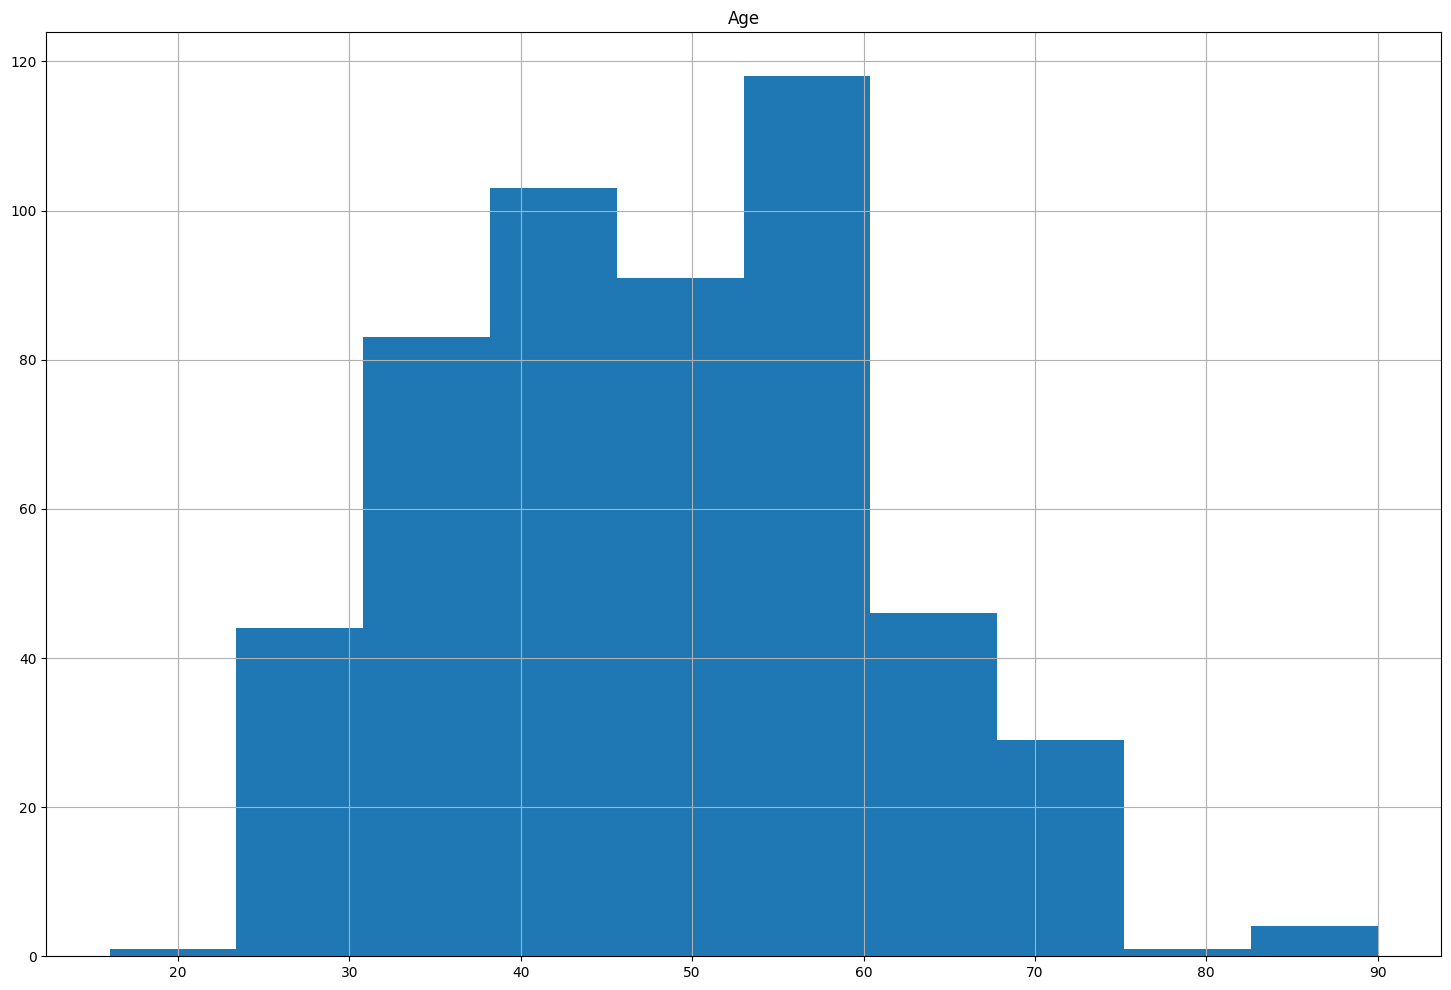

In [11]:
diabetes.hist(figsize=(18,12))
plt.show()

In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in diabetes.columns if diabetes[feature].dtype != 'O']
categorical_features = [feature for feature in diabetes.columns if diabetes[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 1 numerical features : ['Age']

We have 16 categorical features : ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']


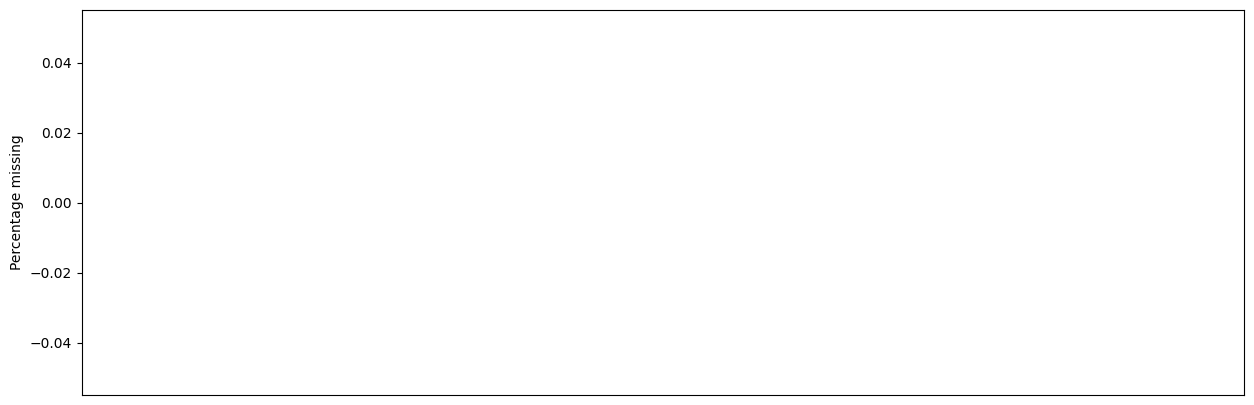

In [13]:
fig, ax = plt.subplots(figsize=(15,5))

missing = diabetes.isna().sum().div(diabetes.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

In [14]:
missing_values_count= diabetes.isnull().sum()
total_cells = np.product(diabetes.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
print(f"Percentage of total missing cells in the data {(total_missing/total_cells) * 100}%")

Percentage of total missing cells in the data 0.0%


Positive: 0, Negative: 0


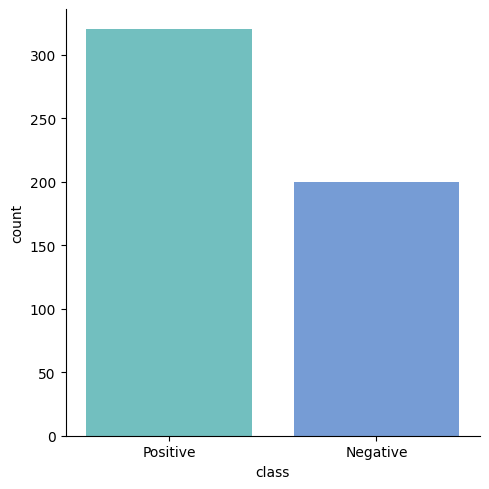

In [15]:
pos = diabetes[diabetes['class']=='pos'].shape[0]
neg = diabetes[diabetes['class']=='neg'].shape[0]
print("Positive: " + str(pos) + ", Negative: " + str(neg))
sns.catplot(data=diabetes, x="class", kind="count", palette="winter_r", alpha=.6)
plt.show()

In [16]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [17]:
# Create cost of the model as per data description
def total_cost(y_true, y_pred):
    '''
    This function takes y_ture, y_predicted, and prints Total cost due to misclassification

    '''
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp + 500*fn
    return cost

In [18]:
# Create a function which can evaluate models and return a report
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

    cost_list=[]
    models_list = []
    accuracy_list = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        train_cost = total_cost(y_train, y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        test_cost = total_cost(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1))
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print(f'- COST: {test_cost}.')
        cost_list.append(test_cost)
        print('='*35)
        print('\n')

    report=pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=["Cost"])

    return report

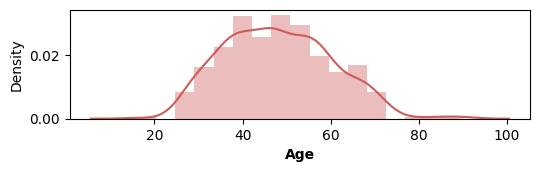

In [19]:
numeric_features = [feature for feature in diabetes.columns if diabetes[feature].dtype != 'O']

plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=diabetes[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

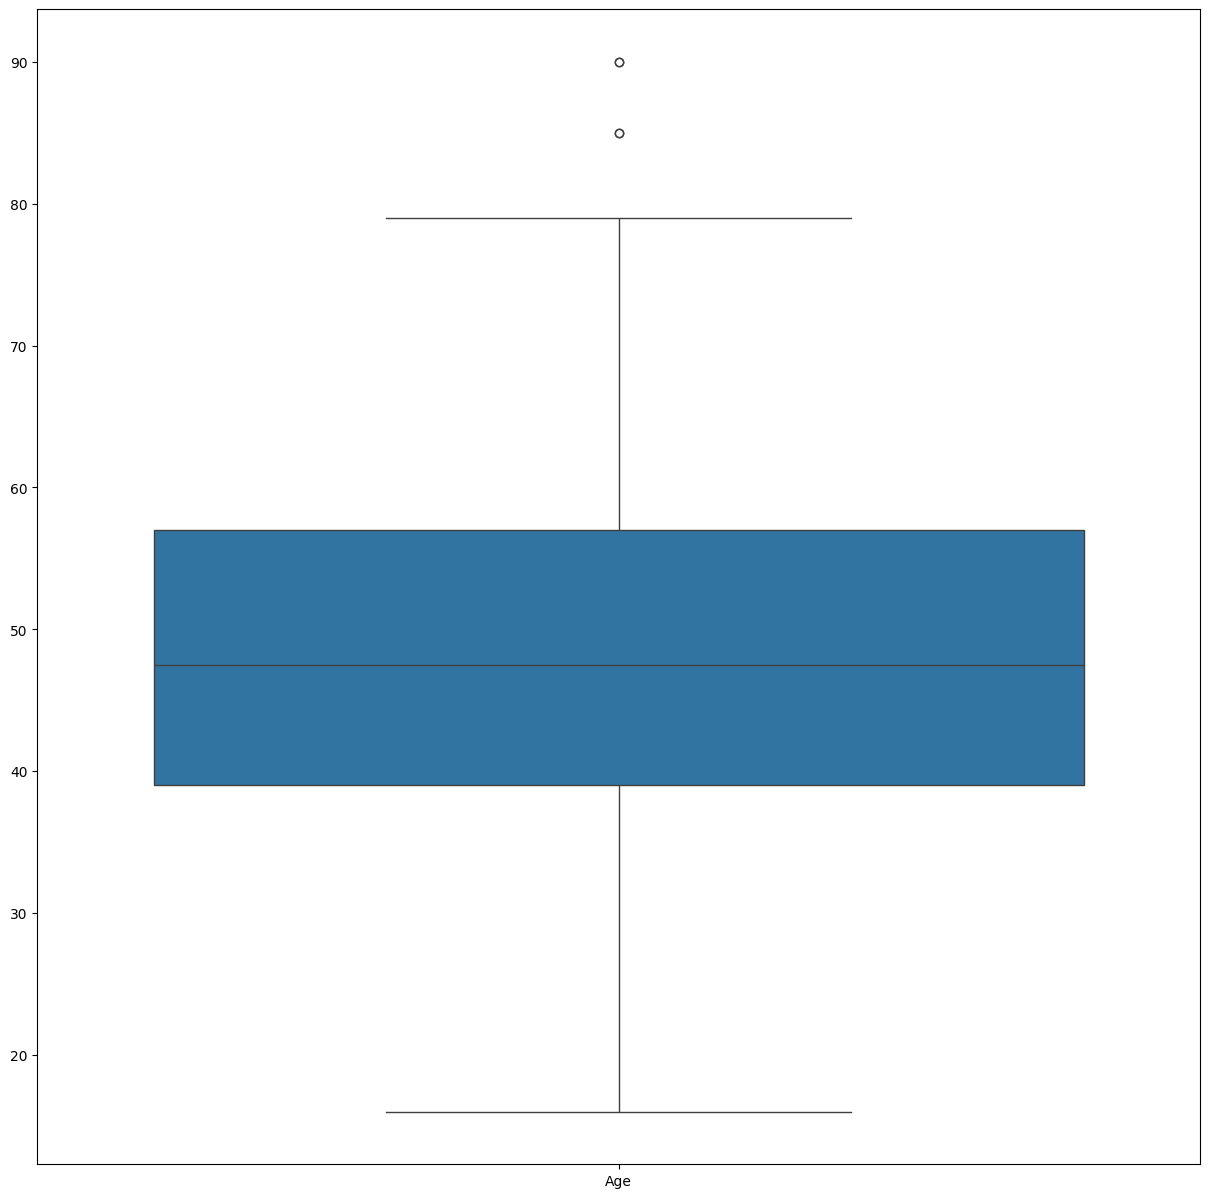

In [20]:
plt.figure(figsize=(15,15))

sns.boxplot(data=diabetes)

# Show the plot
plt.show()

In [21]:
diabetes["Age"].max()

90

In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Encoding categorical features
label_encoder = LabelEncoder()
diabetes['Gender'] = label_encoder.fit_transform(diabetes['Gender'])  # Male: 1, Female: 0


In [23]:
# Encoding binary categorical columns (Yes/No)
binary_columns = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia',
                  'Genital thrush', 'visual blurring', 'Itching', 'Irritability',
                  'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']

diabetes[binary_columns] = diabetes[binary_columns].applymap(lambda x: 1 if x == 'Yes' else 0)


In [24]:
diabetes

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,Positive
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,Positive
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,Positive
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,Negative


In [25]:
# Encoding target column
diabetes['class'] = diabetes['class'].map({'Positive': 1, 'Negative': 0})
diabetes.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0
519,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [27]:
features = diabetes.drop('class', axis=1)
labels = diabetes['class']

# Split the data into training, validation, and test sets
TEST_SIZE = 0.1
RANDOM_STATE = 42

features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True
)

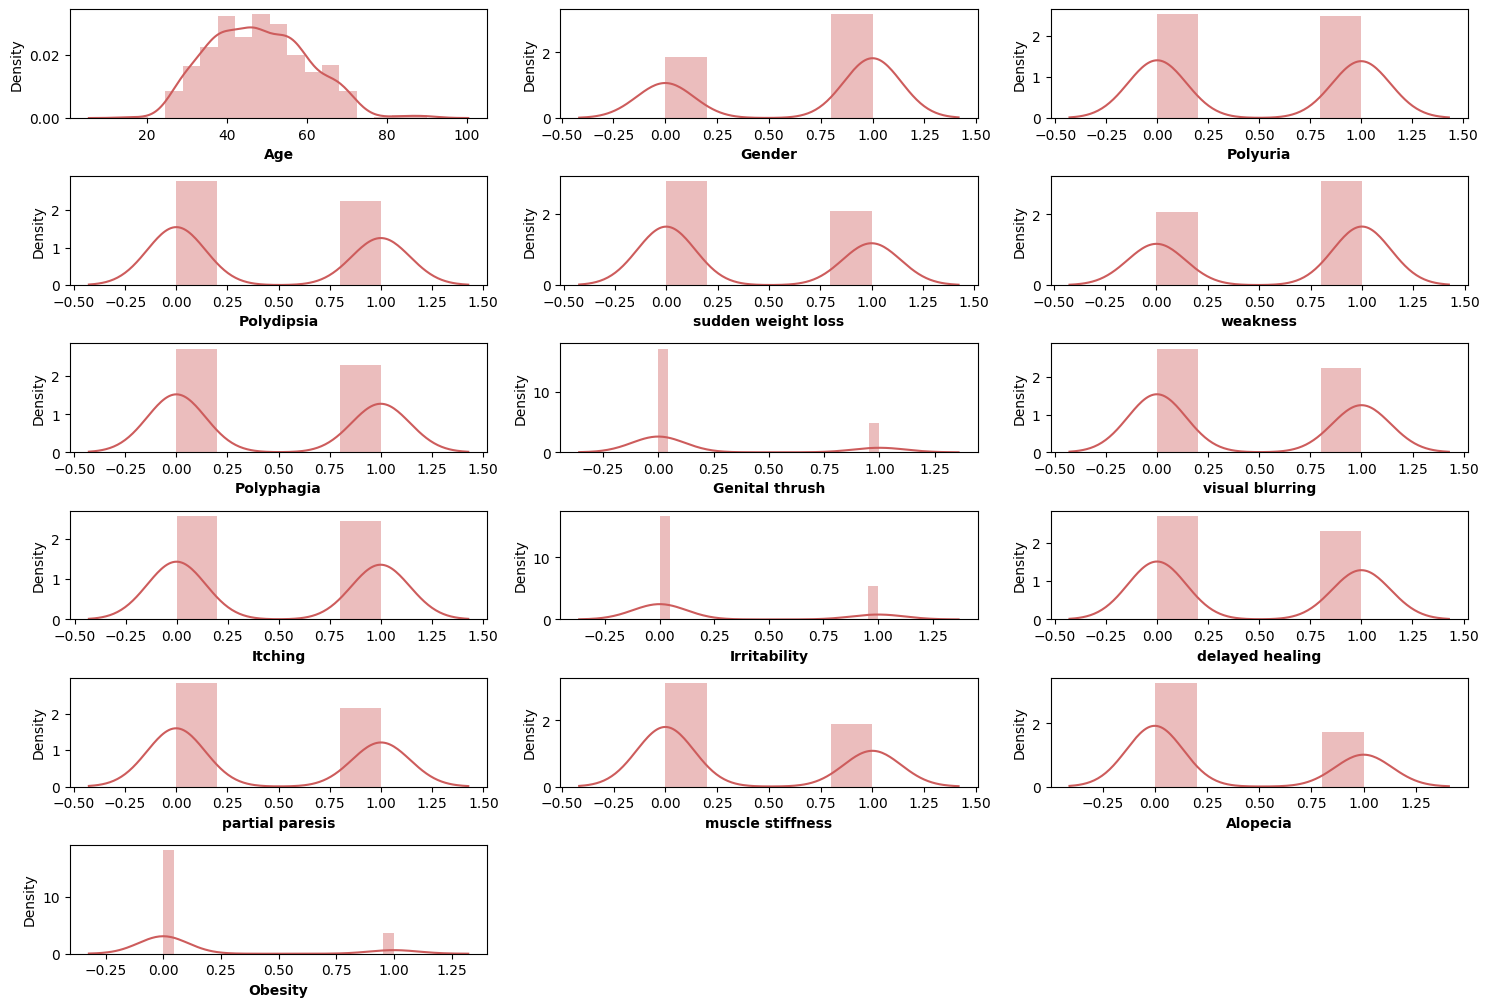

In [28]:
plt.figure(figsize=(15, 100))
for i, col in enumerate(features_train):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=diabetes[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

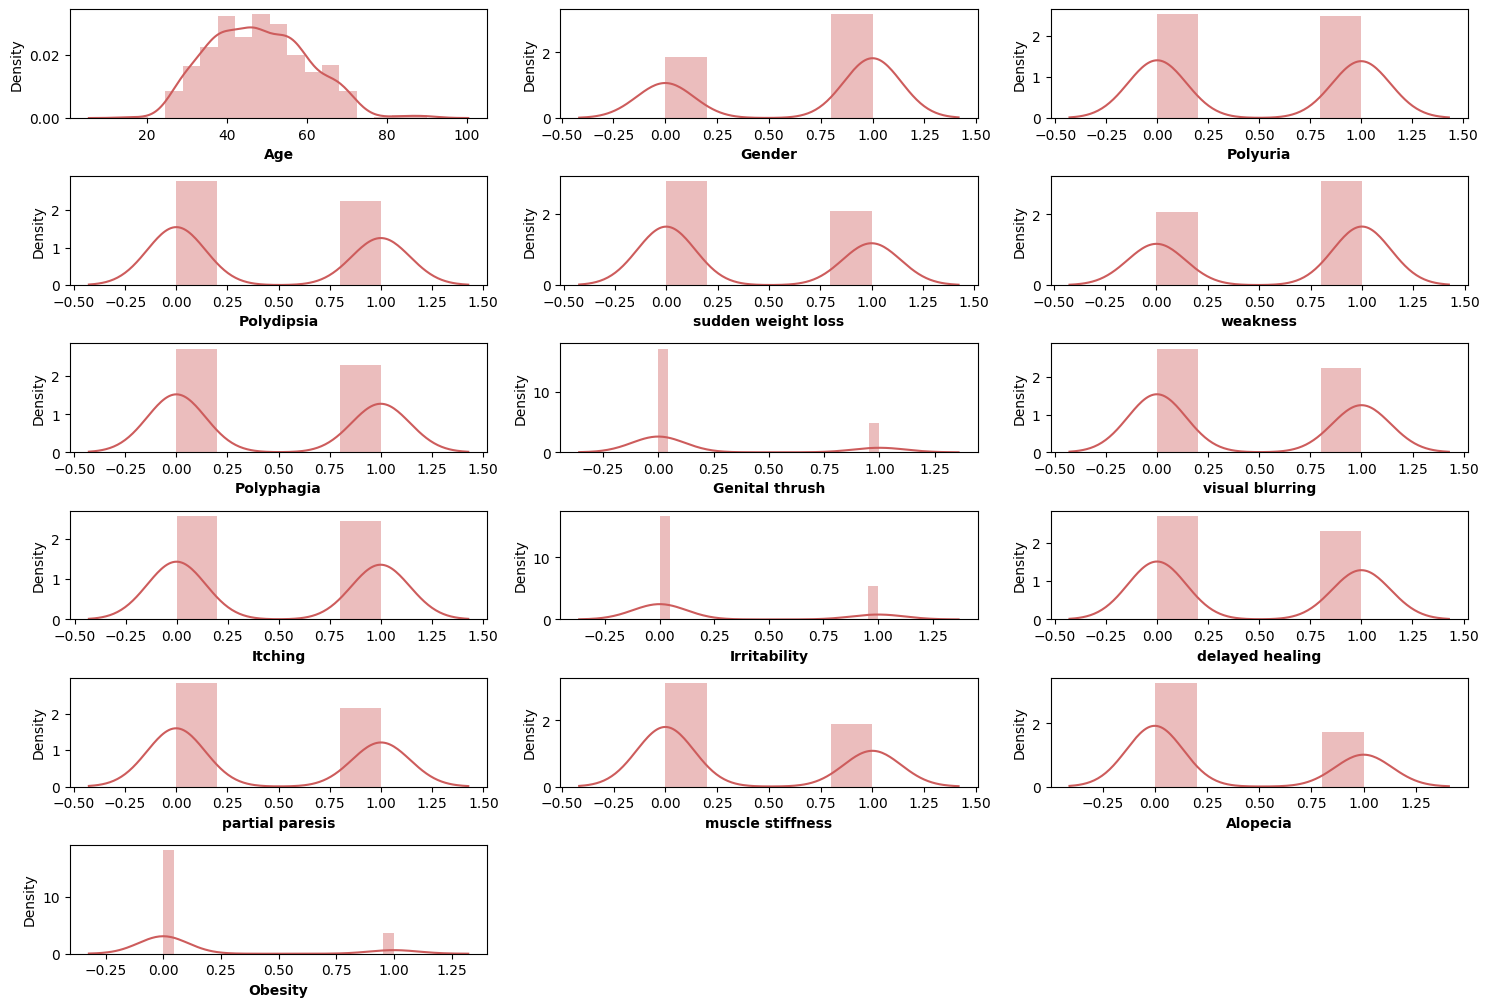

In [29]:
plt.figure(figsize=(15, 100))
for i, col in enumerate(features_test):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=diabetes[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [30]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(features_train)
X_test_scaled = scaler.transform(features_test)
# X_train_scaled

In [31]:
from imblearn.combine import SMOTETomek
# Resample the training data
smt = SMOTETomek(random_state=42, sampling_strategy='minority', n_jobs=-1)
X_train_res, y_train_res = smt.fit_resample(X_train_scaled, labels_train)

In [32]:
# Original class distribution
original_class_distribution = pd.Series(labels).value_counts()
print("Original class distribution:")
print(original_class_distribution)

# Resampled class distribution
resampled_class_distribution = pd.Series(y_train_res).value_counts()
print("Resampled class distribution:")
print(resampled_class_distribution)

Original class distribution:
class
1    320
0    200
Name: count, dtype: int64
Resampled class distribution:
class
1    289
0    289
Name: count, dtype: int64


In [33]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [34]:
report = evaluate_models(X_train_res, y_train_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9828
- F1 score: 0.9831
- Precision: 1.0000
- Recall: 0.9667
- Roc Auc Score: 0.9833
- COST: 500.


Gradient Boosting
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0

In [35]:
report


,Model Name,Cost
0,Random Forest,0
2,Gradient Boosting,0
5,XGBClassifier,0
6,CatBoosting Classifier,0
1,Decision Tree,500
4,K-Neighbors Classifier,1500
7,AdaBoost Classifier,1510
3,Logistic Regression,1520


In [36]:
# Initialize the XGBClassifier
xgb_clf = XGBClassifier(random_state=RANDOM_STATE, use_label_encoder=False, eval_metric='mlogloss')
# Fit the model on the resampled training data
xgb_clf.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [37]:
import joblib

# Save the model to a file
joblib.dump(xgb_clf, 'xgb_model.pkl')

['xgb_model.pkl']

In [38]:
# Predict on the test set
y_test_pred = xgb_clf.predict(X_test_scaled)



In [39]:
print("\nTest Set Evaluation:")
y_train_pred = xgb_clf.predict(X_train_res)
train_accuracy = accuracy_score(y_train_res, y_train_pred)
print(f'Training Set Accuracy: {train_accuracy * 100:.2f}%')

print("\nTest Set Evaluation:")
print(f"Accuracy: {accuracy_score(labels_test, y_test_pred)}")
print("Classification Report:\n", classification_report(labels_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(labels_test, y_test_pred))


Test Set Evaluation:
Training Set Accuracy: 100.00%

Test Set Evaluation:
Accuracy: 0.9807692307692307
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.97      0.98        31

    accuracy                           0.98        52
   macro avg       0.98      0.98      0.98        52
weighted avg       0.98      0.98      0.98        52

Confusion Matrix:
 [[21  0]
 [ 1 30]]


In [51]:
# Define the function to get medical recommendation based on probability
def get_medical_recommendation(probability):
    """
    Returns a medical recommendation based on the risk level.

    Args:
    probability (float): The predicted probability of the risk.

    Returns:
    str: The medical recommendation based on the probability range.
    """
    if 0 <= probability < 0.3:
        return (
            "Low Risk: Maintain a healthy lifestyle with a balanced diet and regular exercise. \n"
            "Continue routine check-ups and stay informed about preventive health measures."
        )
    elif 0.3 <= probability < 0.7:
        return (
            "Moderate Risk: Consider making changes to your diet and increasing physical activity. \n"
            "Consult with a healthcare provider to discuss your risk factors and consider a more detailed health assessment."
        )
    elif 0.7 <= probability <= 1:
        return (
            "High Risk: It is important to seek medical advice immediately. \n"
            "Follow a structured diet and exercise plan as recommended by your healthcare provider. \n"
            "Regular monitoring and potentially medication or other interventions might be necessary."
        )
    else:
        return "Invalid probability value. Please ensure the probability is between 0 and 1."


In [50]:

# Function to predict diabetes and provide recommendation
def predict_diabetes():
    # Collect input for each feature
    age = int(input("Enter age: "))
    gender = int(input("Enter gender (0 for female, 1 for male): "))
    polyuria = int(input("Enter polyuria (0 for No, 1 for Yes): "))
    polydipsia = int(input("Enter polydipsia (0 for No, 1 for Yes): "))
    sudden_weight_loss = int(input("Enter sudden weight loss (0 for No, 1 for Yes): "))
    weakness = int(input("Enter weakness (0 for No, 1 for Yes): "))
    polyphagia = int(input("Enter polyphagia (0 for No, 1 for Yes): "))
    genital_thrush = int(input("Enter genital thrush (0 for No, 1 for Yes): "))
    visual_blurring = int(input("Enter visual blurring (0 for No, 1 for Yes): "))
    itching = int(input("Enter itching (0 for No, 1 for Yes): "))
    irritability = int(input("Enter irritability (0 for No, 1 for Yes): "))
    delayed_healing = int(input("Enter delayed healing (0 for No, 1 for Yes): "))
    partial_paresis = int(input("Enter partial paresis (0 for No, 1 for Yes): "))
    muscle_stiffness = int(input("Enter muscle stiffness (0 for No, 1 for Yes): "))
    alopecia = int(input("Enter alopecia (0 for No, 1 for Yes): "))
    obesity = int(input("Enter obesity (0 for No, 1 for Yes): "))

    # Prepare user data for prediction
    user_data = np.array([[age, gender, polyuria, polydipsia, sudden_weight_loss,
                           weakness, polyphagia, genital_thrush, visual_blurring,
                           itching, irritability, delayed_healing, partial_paresis,
                           muscle_stiffness, alopecia, obesity]])

    # Scaling the data
    scaler = StandardScaler()
    scaler.fit(features_train)  # Fit on the training data
    user_data_scaled = scaler.transform(user_data)

    # Make predictions
    prediction_prob = xgb_clf.predict_proba(user_data_scaled)[0, 1]  # Use predict_proba to get probability
    prediction = 1 if prediction_prob > 0.5 else 0

    # Get the recommendation based on probability
    recommendation = get_medical_recommendation(prediction_prob)

    print(f"Prediction Probability: {prediction_prob:.2f}")
    print("Diabetes Prediction: Positive" if prediction == 1 else "Diabetes Prediction: Negative")
    print(f"Recommendation: {recommendation}")

# Call the function to get user input and make prediction
predict_diabetes()

Enter age: 40
Enter gender (0 for female, 1 for male): 1
Enter polyuria (0 for No, 1 for Yes): 0
Enter polydipsia (0 for No, 1 for Yes): 1
Enter sudden weight loss (0 for No, 1 for Yes): 0
Enter weakness (0 for No, 1 for Yes): 1
Enter polyphagia (0 for No, 1 for Yes): 0
Enter genital thrush (0 for No, 1 for Yes): 0
Enter visual blurring (0 for No, 1 for Yes): 0
Enter itching (0 for No, 1 for Yes): 1
Enter irritability (0 for No, 1 for Yes): 0
Enter delayed healing (0 for No, 1 for Yes): 1
Enter partial paresis (0 for No, 1 for Yes): 0
Enter muscle stiffness (0 for No, 1 for Yes): 1
Enter alopecia (0 for No, 1 for Yes): 1
Enter obesity (0 for No, 1 for Yes): 1
Prediction Probability: 0.92
Diabetes Prediction: Positive
Recommendation: High Risk: It is important to seek medical advice immediately. 
Follow a structured diet and exercise plan as recommended by your healthcare provider. 
Regular monitoring and potentially medication or other interventions might be necessary.


In [52]:
diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
